# Requirement: 
#### 1. What type of jewelry (gem) is used in the products? 
#### 2. Which metal is the most used?
#### 3. What is the average price of jewelry by metal?
#### 4. What is the average price of each metal?
#### 5. Top most expensive jewelry?

In [87]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('cartier_catalog.csv')

In [89]:
df.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [90]:
df.shape

(692, 7)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ref          692 non-null    object 
 1   categorie    692 non-null    object 
 2   title        692 non-null    object 
 3   price        692 non-null    float64
 4   tags         692 non-null    object 
 5   description  692 non-null    object 
 6   image        692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


In [92]:
df.isna().sum()

ref            0
categorie      0
title          0
price          0
tags           0
description    0
image          0
dtype: int64

In [93]:
df['str_split'] = df['tags'].str.split(',')
df['mental']  =  df.str_split.str.get(0).str.strip()
df['1st_gem'] =  df.str_split.str.get(1).str.strip()
df['2nd_gem'] =  df.str_split.str.get(2).str.strip()
df['3rd_gem'] =  df.str_split.str.get(3).str.strip() 
df['4th_gem'] =  df.str_split.str.get(4).str.strip()
df.fillna(0 , inplace = True)
del df['str_split'] 

In [96]:
df.head(10)

,ref,categorie,title,price,tags,description,image,mental,1st_gem,2nd_gem,3rd_gem,4th_gem
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,yellow gold,0,0,0,0
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,platinum,0,0,0,0
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png,pink gold,0,0,0,0
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png,white gold,0,0,0,0
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png,yellow gold,0,0,0,0
5,B4085200,rings,Love wedding band,1070.0,pink gold,"Love wedding band, 18K rose gold. Width: 3.6mm.",/content/dam/rcq/car/58/73/14/587314.png,pink gold,0,0,0,0
6,B4085100,rings,Love wedding band,1140.0,white gold,"Love wedding band, 18K white gold. Width: 3.6mm.",/content/dam/rcq/car/59/22/21/592221.png,white gold,0,0,0,0
7,B4085300,rings,Love wedding band,2380.0,platinum,"Love wedding band, 950/1000 platinum. Width: 3...",/content/dam/rcq/car/62/40/10/624010.png,platinum,0,0,0,0
8,B4032400,rings,"Love ring, 3 diamonds",3500.0,"yellow gold, diamonds","Love ring, 18K yellow gold, set with 3 brillia...",/content/dam/rcq/car/58/47/16/584716.png,yellow gold,diamonds,0,0,0
9,B4087500,rings,"Love ring, 3 diamonds",3500.0,"pink gold, diamonds","Love ring, 18K rose gold, set with 3 brilliant...",/content/dam/rcq/car/58/39/70/583970.png,pink gold,diamonds,0,0,0


In [ ]:
df.drop(['ref', 'title', 'tags', 'description', 'image'], axis = 1, inplace = )

In [40]:
df.head()

,categorie,price,mental,1st_gem,2nd_gem,3rd_gem,4th_gem
0,rings,1650.0,yellow gold,0,0,0,0
1,rings,3650.0,platinum,0,0,0,0
2,rings,1650.0,pink gold,0,0,0,0
3,rings,1770.0,white gold,0,0,0,0
4,rings,1070.0,yellow gold,0,0,0,0


### 1. What type of jewelry (gem) is used in the products? 

In [ ]:
gems = pd.concat([df['1st_gem'], df['2nd_gem'], df['3rd_gem'], df['4th_gem' ]], axis = 0)

In [52]:
gems_value = gems.value_counts()[1:].to_frame().reset_index()

In [54]:
gems_value.columns = ['gem_type', 'count']

In [55]:
gems_value

,gem_type,count
0,diamonds,431
1,onyx,90
2,emeralds,70
3,diamond,61
4,yellow gold,37
5,pink gold,37
6,tsavorite garnets,35
7,sapphires,19
8,ceramic,17
9,lacquer,11


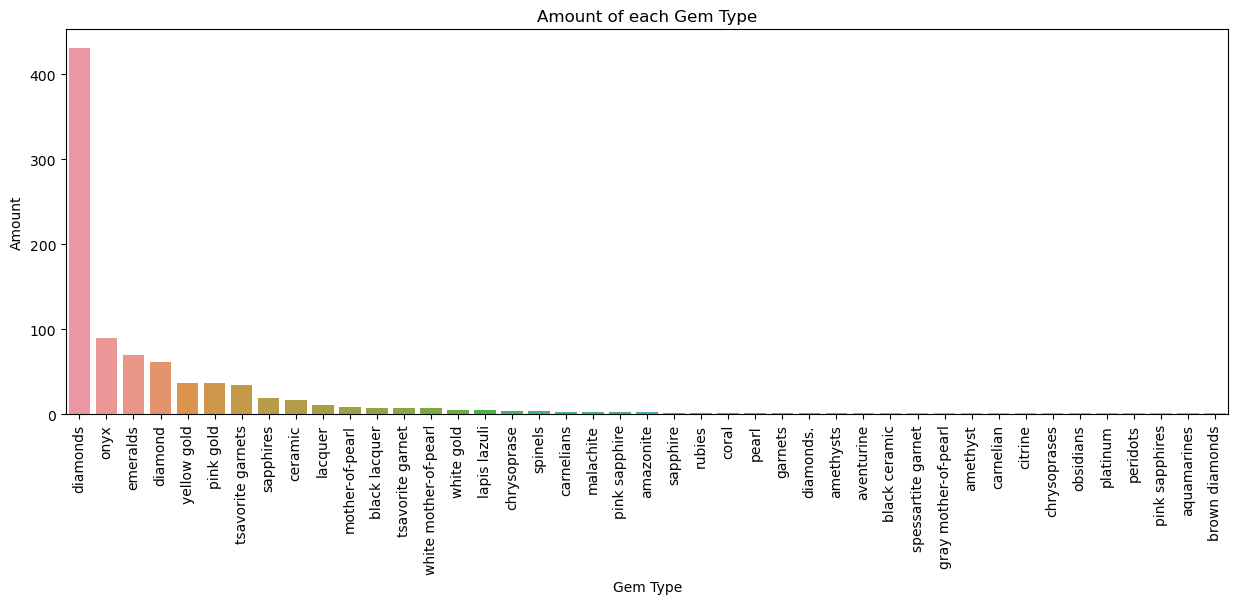

In [56]:
plt.figure(figsize =(15,5))
sns.barplot(data = gems_value, x= 'gem_type', y = 'count')
plt.xlabel('Gem Type')
plt.ylabel('Amount')
plt.title('Amount of each Gem Type')
plt.xticks(rotation = 90)
plt.show()

### 2. Which metal is the most used?

In [58]:
category = df.groupby(['categorie'])['mental'].value_counts().to_frame().reset_index()

In [59]:
category

,categorie,mental,count
0,bracelets,white gold,61
1,bracelets,pink gold,52
2,bracelets,yellow gold,43
3,bracelets,platinum,4
4,earrings,white gold,54
5,earrings,pink gold,34
6,earrings,yellow gold,28
7,earrings,platinum,2
8,necklaces,white gold,66
9,necklaces,pink gold,49


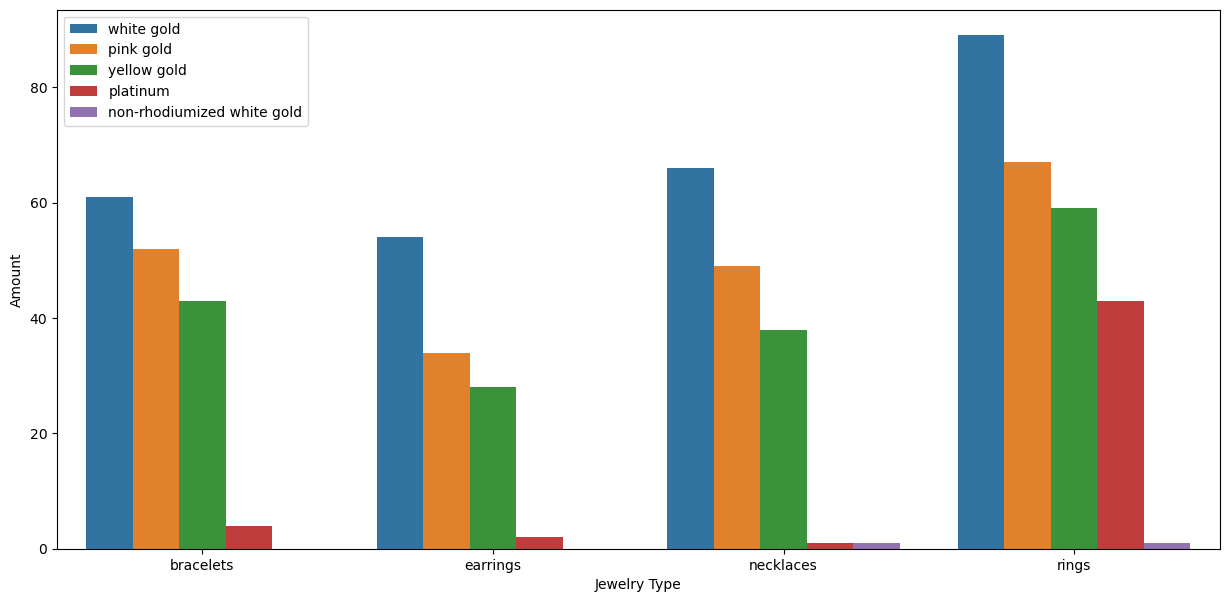

In [61]:
plt.figure(figsize =(15,7))
sns.barplot(data = category, x= 'categorie' , y = 'count', hue = 'mental')
plt.xlabel('Jewelry Type')
plt.ylabel('Amount')
plt.legend(loc = 'upper left')
plt.show()

### 3. What is the average price of jewelry by metal?

In [62]:
avg_price = df.groupby(['categorie', 'mental'])['price'].mean().round(2).to_frame().reset_index()
avg_price

,categorie,mental,price
0,bracelets,pink gold,28741.92
1,bracelets,platinum,209250.00
2,bracelets,white gold,50363.28
3,bracelets,yellow gold,39504.42
4,earrings,pink gold,8146.47
5,earrings,platinum,117000.00
6,earrings,white gold,36350.56
7,earrings,yellow gold,11328.21
8,necklaces,non-rhodiumized white gold,19700.00
9,necklaces,pink gold,18284.49


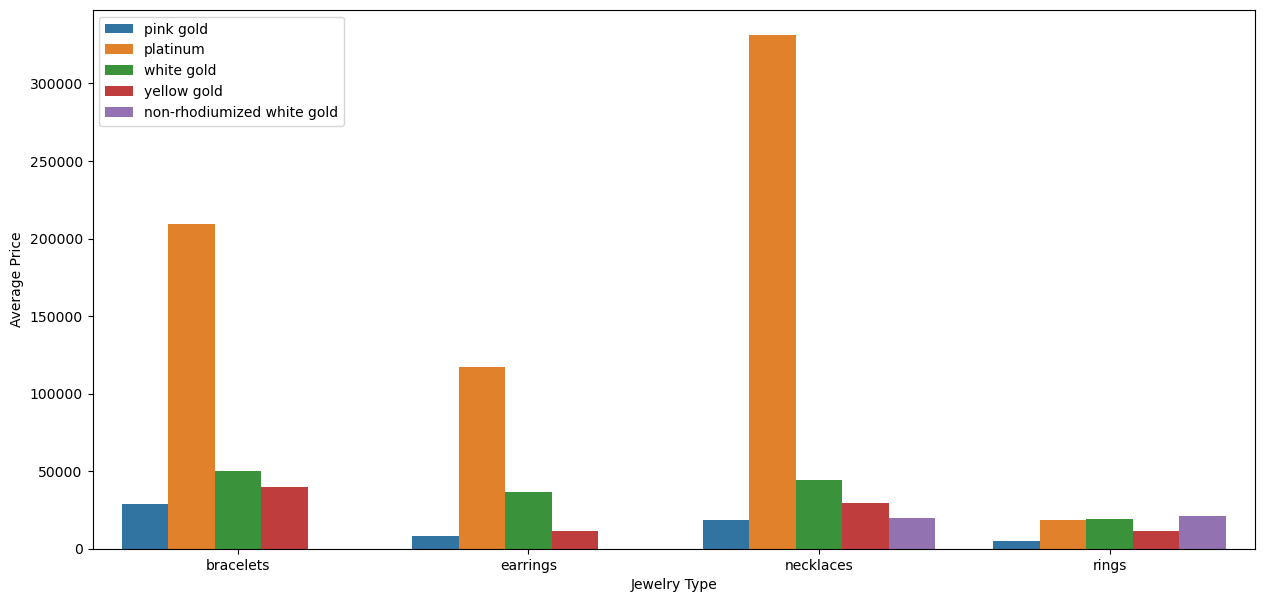

In [64]:
plt.figure(figsize =(15,7))
sns.barplot(data = avg_price, x= 'categorie' , y = 'price', hue = 'mental')
plt.xlabel('Jewelry Type')
plt.ylabel('Average Price')
plt.legend(loc = 'upper left')
plt.show()

### 4. What is the average price of each metal?

In [65]:
mental_price = df.groupby('mental')['price'].mean().round(2).to_frame().reset_index()

In [66]:
mental_price

,mental,price
0,non-rhodiumized white gold,20550.00
1,pink gold,14917.13
2,platinum,44084.40
3,white gold,35855.22
4,yellow gold,22524.23


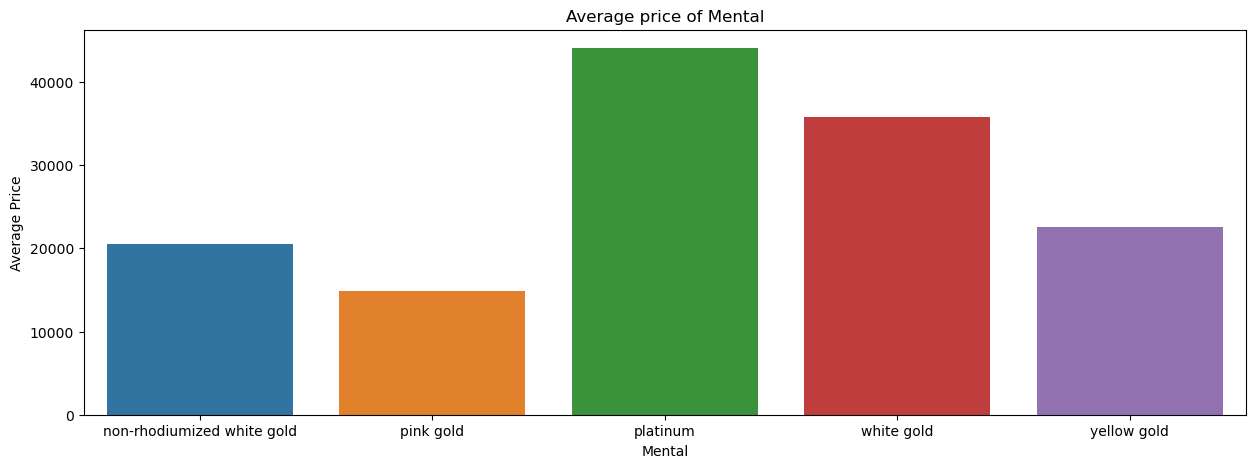

In [67]:
plt.figure(figsize =(15,5))
sns.barplot(data = mental_price, x= 'mental', y = 'price')
plt.xlabel('Mental')
plt.ylabel('Average Price')
plt.title('Average price of Mental')
plt.show()

### 5. Top most expensive jewelry?

In [ ]:
top_jel = df.groupby('1st_gem')['price'].mean().round(2).sort_values(ascending = False).to_frame().reset_index()

In [85]:
top_jel = top_jel.head(5)
top_jel

,1st_gem,price
0,rubies,257000.00
1,tsavorite garnet,200000.00
2,emeralds,127830.21
3,chrysoprase,93490.00
4,sapphires,70420.67


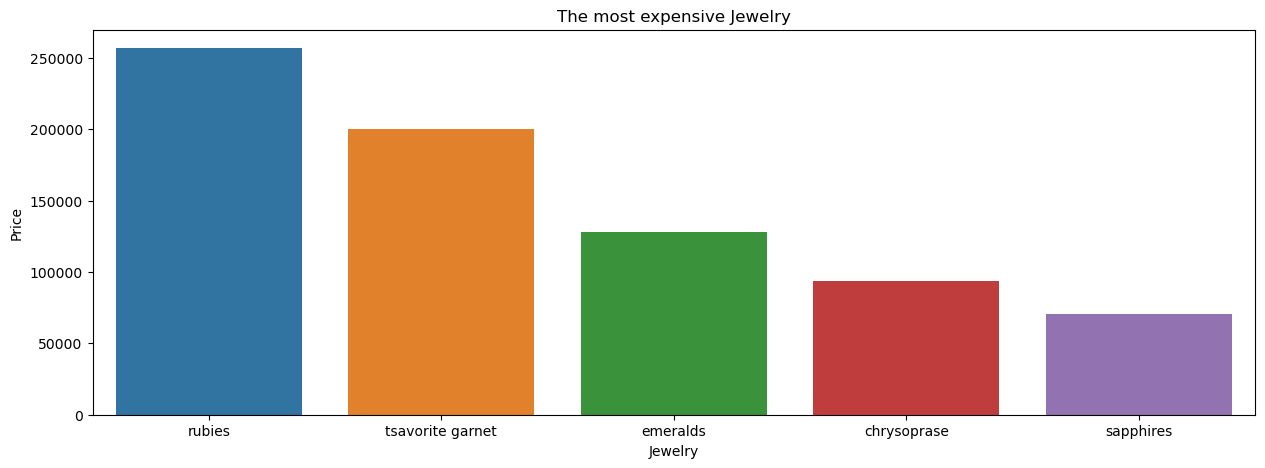

In [82]:
plt.figure(figsize =(15,5))
sns.barplot(data = top_jel, x= '1st_gem', y = 'price')
plt.xlabel('Jewelry')
plt.ylabel('Price')
plt.title('The most expensive Jewelry')
plt.show()